In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/mnist_train.csv')
df.shape
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
#we are creating one numpy array from panda dataframe
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [5]:
X = data[:,1:]  #data
Y = data[:,0]  #label
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [13]:
#we are going to divide X into training data and testing data
#Y into testing label and training label
split = int(0.8*X.shape[0])  #it will give 80 percent of total rows
print(split)
X_train = X[:split,:]  #slicing dataset, taking rows upto split and all the columns.
Y_train = Y[:split]  
X_test = X[split:49000 ,:]
Y_test = Y[split:49000]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


48000
(48000, 784) (48000,)
(1000, 784) (1000,)


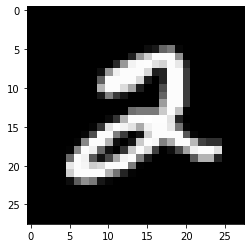

2


In [14]:
#visualize sample
def drawImg(sample):
  img = sample.reshape((28,28))
  plt.imshow(img, cmap = 'gray') #cmap is colour map to make image grey as matplotlib is making image colourful
  plt.show()

drawImg(X_train[5])     #actually one row is representing one img itself
print(Y_train[5])


In [15]:
#KNN Algorithm
def dist(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, queryPoint, k = 5):    #here k means upto how many numbers u want to consider for majority
  vals = []
  m = X.shape[0]

  for i in range(m):
    d = dist(queryPoint, X[i])      #here X is the dataset
    vals.append((d,Y[i]))           # Y is the label 

  vals = sorted(vals)   #from this we are going to consider nearest K/first points
  vals = vals[:k]       #taking 1st k rows from vals
  vals = np.array(vals)   #we are making vals as np array 
  #print(vals)
  new_vals = np.unique(vals[:,1], return_counts = True)  #it will give two array 1.uniq array and 2nd count array
  #print(new_vals)
  index = new_vals[1]. argmax()
  pred = new_vals[0][index]
  return pred



In [16]:
# making prediction
#in knn everything happens at prediction time , no training time.

pred = knn(X_train, Y_train, X_test[300])
print(int(pred))
#print(X_test.shape[0])

3


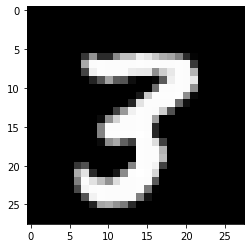

3
1000


In [17]:
drawImg(X_test[300])
print(Y_test[300])
print(Y_test.shape[0])


In [19]:
#accuracy of KNN over test set

def accuracy_mat(X_train, Y_train, X_test, Y_test):
  lim = X_test.shape[0]
  count = 0
  for i in range(lim):
    pred = knn(X_train, Y_train, X_test[i])  #pred will be of type float becuase of numpy
    print(i, " ", pred," ", Y_test[i])
    if int(pred) == Y_test[i]:       #pred will return value in float so we are type casting it
      count += 1
  return count/float(X_test.shape[0]) *100.00

accuracy = accuracy_mat(X_train, Y_train, X_test, Y_test)
print(accuracy)
    



0   4.0   4
1   7.0   7
2   8.0   8
3   8.0   8
4   5.0   5
5   6.0   6
6   6.0   6
7   8.0   8
8   2.0   2
9   2.0   2
10   7.0   7
11   8.0   8
12   0.0   0
13   4.0   4
14   3.0   3
15   4.0   4
16   5.0   5
17   2.0   2
18   4.0   4
19   2.0   2
20   9.0   4
21   8.0   8
22   1.0   1
23   0.0   0
24   1.0   1
25   0.0   0
26   0.0   0
27   1.0   1
28   8.0   8
29   2.0   2
30   9.0   9
31   3.0   3
32   6.0   6
33   6.0   6
34   2.0   2
35   7.0   7
36   9.0   9
37   8.0   8
38   3.0   3
39   0.0   0
40   1.0   1
41   1.0   1
42   9.0   9
43   2.0   2
44   1.0   1
45   3.0   3
46   5.0   5
47   4.0   4
48   4.0   4
49   5.0   5
50   7.0   7
51   6.0   6
52   6.0   6
53   7.0   7
54   6.0   6
55   8.0   8
56   4.0   4
57   9.0   9
58   5.0   5
59   0.0   0
60   8.0   8
61   1.0   1
62   8.0   8
63   2.0   2
64   3.0   3
65   1.0   3
66   6.0   6
67   4.0   4
68   4.0   4
69   5.0   5
70   7.0   2
71   6.0   6
72   9.0   9
73   7.0   7
74   1.0   1
75   8.0   8
76   3.0   3
77   9.0 